
**Created by:**

__[Viktor Varga](https://github.com/vvarga90)__

**Translated by:**

__Gulyás János Adrián__

<br>

<img src="https://docs.google.com/uc?export=download&id=1WzgXsCoz8O-NeBlJTbuLPC1iIFDmgYt1" style="display:inline-block">
<hr>

# Linear regression using gradient descent

Source of the databases at: http://www.dcc.fc.up.pt/~ltorgo/Regression/DataSets.html

Imports

In [ ]:
import numpy as np
import urllib.request

import matplotlib.pyplot as plt

Feature scaling methods: one for calculating the average and the deviation of each feature, which will be used for normalizing the input, and another one that normalizes an input based on the already calculated average and deviation.

In [ ]:
def std_normalization(data):
    # params: data: ndarray(n_samples, n_features)
    data = np.asarray(data, dtype=np.float64)
    eps = 0.0000001
    x_mean = np.mean(data, axis=0)
    x_std = np.std(data, axis=0)
    x_norm = (data-x_mean) / (x_std + eps)
    
    return x_norm, x_mean, x_std
  
def std_normalize_with_given_meanstd(data, x_mean, x_std):
    eps = 0.0000001
    x_norm = (data-x_mean) / (x_std + eps)
    return x_norm

Loading in the data ("Wine Quality Data Set" from the UCI ML repository).

**Exercise:** Let's rate the quality of wines on a scale from 1 to 10 based on the wine's chemical composition.

In [ ]:
url = 'https://raw.githubusercontent.com/vvarga90/dlmatek_public_files/master/winequality-red.csv'

ftpstream = urllib.request.urlopen(url)
content_reg = ftpstream.read().decode('utf-8')

Processing data: from text file to numpy array.

In [ ]:
lines = content_reg.split('\n')
words = [line.split(';') for line in lines]
attr_names = words[0]
data = words[1:1001]
data = [[float(item) for item in rec] for rec in data]
data = np.array(data, dtype=np.float32)

features = data[:,:-1]
labels = data[:,-1]

print("Data attributes:")
print(attr_names)
print(features.shape)
print(labels.shape)



Data attributes:
['"fixed acidity"', '"volatile acidity"', '"citric acid"', '"residual sugar"', '"chlorides"', '"free sulfur dioxide"', '"total sulfur dioxide"', '"density"', '"pH"', '"sulphates"', '"alcohol"', '"quality"']
(1000, 11)
(1000,)


Selecting X, Y, separating into a train and a test set

In [ ]:
X_train = features[:500]
y_train = labels[:500]
X_test = features[500:]
y_test = labels[500:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(500, 11)
(500,)
(500, 11)
(500,)


As a reminder we would like to find the optimal parameter $\theta$ for the function
$$f_{\theta}(x)=\theta_0+\theta x$$
such that it minimizes the squared error:
$$L(\mathcal{D},\theta)=\frac{1}{N}\sum_{n=1}^N(y_n-f_{\theta}(x_n))^2.$$

On the lecture we learned about the normal equation to solve this:
$$\theta=(X^TX)^{-1}X^Ty$$
Turns out this is a really bad approach to solve this problem because numerical stabilities (see the exercise at the end of the notebook). Instead, we are going to use gradient descent, to solve the problem. First note that (ignoring $\theta_0$):
$$L(\mathcal{D},\theta)=\frac{1}{N}\sum_{n=1}^N(y_n-f_{\theta}(x_n))^2=\frac{1}{N}\sum_{n=1}^N(y_n-\theta x_n)^2.$$
This is a quadratic function in $\theta$, we can plot it:

![alt](https://drive.google.com/uc?export=download&id=1kAr_3NqddrbZua1Z5EOgzPnJlQphpKX6)

The algorithm of gradient descent:
1. Initialize $\theta^{(0)}$ to zero (or set randomly)
2. Update $\theta$:  
$\theta^{(t)}=\theta^{(t-1)}−\alpha\nabla_{\theta} L(\mathcal D, \theta)$
3. Iterate until it converges, or for a certain number of iterations.

In our case $\nabla_{\theta} L(\mathcal D, \theta)=-2x_n(y_n-\theta x_n)$. 
The linear regression class. `fit_intercept` is `True` if we want to use the $\theta_0$ constant parameter.

In [ ]:
class LinearRegression:
    def __init__(self, lr=0.01, num_iter=10000, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.eps = 0.00000001
    
    def __add_intercept(self, X):
        # add a column of 1s
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __loss(self, h, y):
        return np.mean(np.square(h - y))
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        loss_vals = []
        for i in range(self.num_iter):
            h = np.dot(X, self.theta)
            gradient = 2*np.dot(X.T, h - y) / y.size
            self.theta -= self.lr * gradient
            
            h = np.dot(X, self.theta)
            loss = self.__loss(h, y)
            loss_vals.append(loss)
        
        return loss_vals
    
    def predict(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return np.dot(X, self.theta)
    

Feature scaling.

In [ ]:
X_train_n, x_mean, x_std = std_normalization(X_train)
X_test_n = std_normalize_with_given_meanstd(X_test, x_mean, x_std)

Training and evaluation.

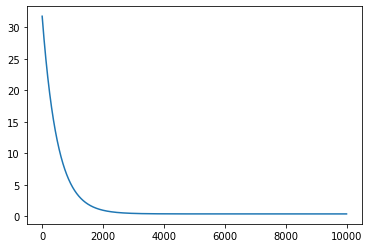

Training mean absolute error: 0.5001925998307676
Test mean absolute error: 0.5147913228627844


In [ ]:
# if features are not scaled to same magnitude higher learning rate causes big fluctuations
# model = LinearRegression(lr=0.00001, num_iter=50000)   

model = LinearRegression(lr=0.0005, num_iter=10000)

loss = model.fit(X_train_n, y_train)

plt.plot(loss)
plt.show();

preds_train = model.predict(X_train_n)
print("Training mean absolute error: " + str(np.fabs(preds_train - y_train).mean()))
preds_test = model.predict(X_test_n)
print("Test mean absolute error: " + str(np.fabs(preds_test - y_test).mean()))

**Conclusion:** The trained model could predict the wines' quality rating on a scale from 1 to 10 with an absolute error of around 0.5. Considering that most of the wines in the database have a rating between 3 and 8, this is not exactly a remarkable result. Perhaps the wine that's proclaimed to be high quality is the same as a cheaper variant, and calling either wine higher quality is just plain snobbism? Or perhaps a linear function based on the chemical compound is not enough to approximate the quality sticker given by professionals, and we require a more complex model?

Linear regression is already implemented in multiple python libraries. One implementation from the sklearn package:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

## Exercise

Solve the linear regression problem with the normal equation (see above). Compare it to our gradient descent solution:  
- Which one has the lower train/test error?
- Which one has the lower loss (the $L(\mathcal D,\theta)$ value)?

*(For those who did numerical analysis)* We are inverting the matrix $X^TX$, which can be numerically unstable. Calculate the condition number of $X^TX$. What does it mean for the stability of our normal equation? Recall that
$$\kappa(M)=\frac{\sigma_{max}(M)}{\sigma_{min}(M)},$$
where $\sigma_{max}(M)$ and $\sigma_{max}(M)$ are the maximal and minimal singular values of $M$.
